In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#데이터 분석 과정
##주제 -- 수집 -- 전처리 --EDA -- 예측시스템(회귀(수치예측),분류) -- 실제예측 -- 시각화/서비스구현
## y = ax + b ,a는 기울기 , b는 y절편, x는 변수 값
## y = ax1 + cx2 + dx3 + b
## y는 죽은것인가/살것인가에 대한 결과 예측 값
## x1, x2, x3가 결과를 결정하는 변수들
## => age, pclass, alone등이 x(변수)가 된다.


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [9]:
raw_data.describe()#수치데이터 분석 하는 함수: describe

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [59]:
svc = raw_data['survived'].value_counts()
svc

0    809
1    500
Name: survived, dtype: int64

In [62]:
svc.index=['death','alived']

In [63]:
type(svc)#인덱스와 values의 결합

pandas.core.series.Series

KeyError: 'survived'

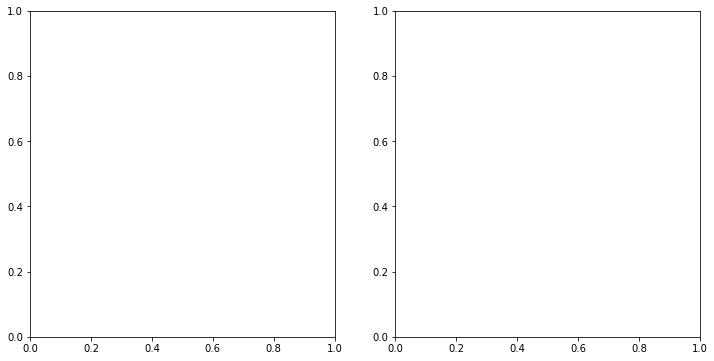

In [65]:
# f,ax=plt.subplots(1,2,figsize=(12,6))

# raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],#explode간격
#                                              autopct='%1.2f%%',ax=ax[0])
# ax[0].set_title('Survived')
# ax[0].set_ylabel('')

# sns.countplot('survived', data=raw_data,ax=ax[1])
# ax[1].set_title('Survived')
# plt.show()

f, ax = plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct ='%1.2f%%' ,ax=ax[0])#,ax=ax[0]첫번째 축
ax[0].set_title('Survived')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [27]:
#age의 분포를 그려보세요
#pclass별 평균
#변수들간의 상관도
#heatmap

In [28]:
#age의 분포를 그려보세요
raw_data['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

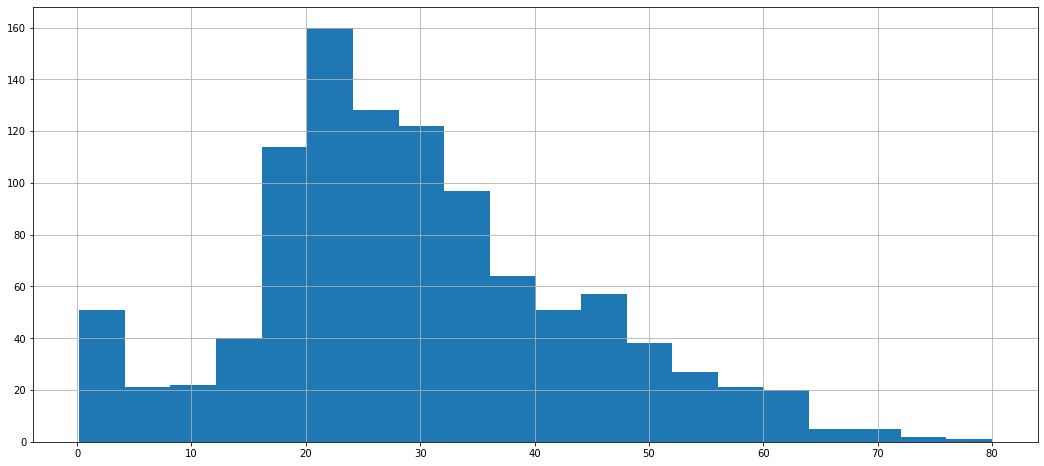

In [36]:
raw_data['age'].hist(bins=20,figsize=(18,8));

In [37]:
#pclass별 평균

In [66]:
raw_data.groupby(by='pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [39]:
raw_data_pclass = raw_data['pclass'].value_counts()
raw_data_pclass

3    709
1    323
2    277
Name: pclass, dtype: int64

C:\Users\aaa77\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


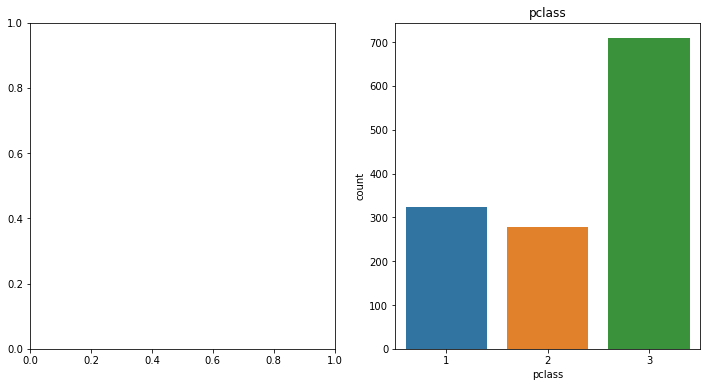

In [50]:

f, ax = plt.subplots(1,2,figsize=(12,6))

#raw_data['pclass'].value_counts().plot.pie(explode=[0.1,0.1], autopct ='%1.2f%%' ,ax=ax[0])#,ax=ax[0]첫번째 축
#ax[0].set_title('pclass')

sns.countplot('pclass',data=raw_data,ax=ax[1])
ax[1].set_title('pclass')
plt.show()

In [67]:
#변수들간의 상관도
rd_corr = raw_data.corr()
rd_corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


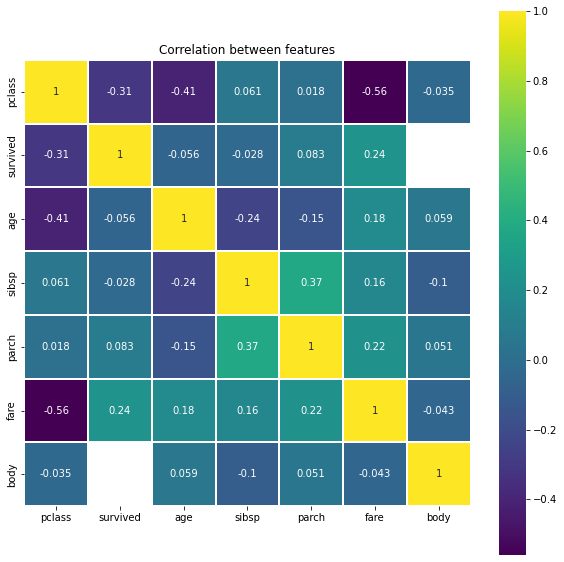

In [70]:
plt.figure(figsize=(10, 10))
sns.heatmap(rd_corr, linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [71]:
#성별 카운트#성별로 생사인원
raw_data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [80]:
sex_survived=raw_data.groupby(by='sex').mean()
sex_survived.T

sex,female,male
pclass,2.154506,2.372479
survived,0.727468,0.190985
age,28.687071,30.585233
sibsp,0.652361,0.413998
parch,0.633047,0.247924
fare,46.198097,26.154601
body,166.625000,160.398230


C:\Users\aaa77\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'sex'

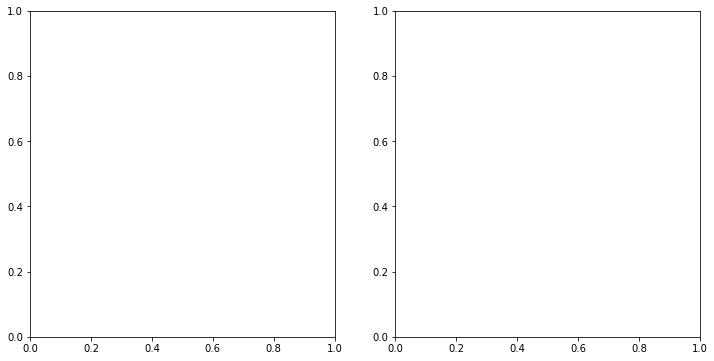

In [81]:

f, ax = plt.subplots(1,2,figsize=(12,6))

#raw_data['pclass'].value_counts().plot.pie(explode=[0.1,0.1], autopct ='%1.2f%%' ,ax=ax[0])#,ax=ax[0]첫번째 축
#ax[0].set_title('pclass')

sns.countplot('sex',data=sex_survived,ax=ax[1])
ax[1].set_title('sex')
plt.show()

In [75]:
#나이대별로 카운트
#나이대별 생사인원
raw_data.isnull().sum()#나이값 빈값 몇개인지

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
#age가 결측치가 들어있는데
#어떻게 해야하는가?
#1.컬럼삭제
#2.행삭제
#3. 다른 값으로 대체